# Eksperimen Klasifikasi Data
Notebook ini memuat langkah-langkah eksplorasi data dan pembuatan model klasifikasi menggunakan data dari file `el4233-2018-2019-02-klasifikasi-train.csv`.

**Import Library & Load Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('el4233-2018-2019-02-klasifikasi-train.csv')
df.head()

,No,X0,X1,Y
0,0,0.684314,1.102777,0
1,1,0.218752,0.122695,1
2,2,0.034522,0.329218,1
3,3,-0.323019,1.479858,0
4,4,2.303018,-0.369103,1


**Penjelasan**
* `pandas`: Membaca file CSV dan mengelola data dalam bentuk tabel.

* `matplotlib.pyplot` & `seaborn`: Untuk membuat grafik dan visualisasi data.

* `train_test_split`: Memisahkan data menjadi data pelatihan dan pengujian.

* `RandomForestClassifier`: Model klasifikasi berbasis hutan acak (random forest).

* `classification_report`, `confusion_matrix`: Untuk mengukur performa model.

* `df.head()`: Menampilkan 5 baris pertama data.

## Eksplorasi Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      1000 non-null   int64  
 1   X0      1000 non-null   float64
 2   X1      1000 non-null   float64
 3   Y       1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


**Penjelasan**
* Mengecek distribusi kelas dalam kolom `Label` (target).

* Ini membantu melihat apakah data seimbang (jumlah masing-masing kelas setara) atau tidak.



In [3]:
df.describe()

,No,X0,X1,Y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.637346,0.504462,0.497000
std,288.819436,0.814304,0.649872,0.500241
min,0.000000,-1.370723,-0.874954,0.000000
25%,249.750000,0.116160,-0.058576,0.000000
50%,499.500000,0.650223,0.495358,0.000000
75%,749.250000,1.146485,1.093339,1.000000
max,999.000000,2.376467,1.894691,1.000000


**Penjelasan**
* Membuat plot batang jumlah data per kelas (`Label`) untuk melihat ketimpangan kelas secara visual.

In [4]:
df['Y'].value_counts()

,count
Y,
0,503
1,497


**Penjelasan**
* `X`: Semua kolom kecuali `Label` sebagai fitur (variabel input).

* `y`: Kolom `Label` sebagai target/output.

* `train_test_split`: Memisahkan data menjadi 70% pelatihan, 30% pengujian.

## Visualisasi Distribusi Kelas

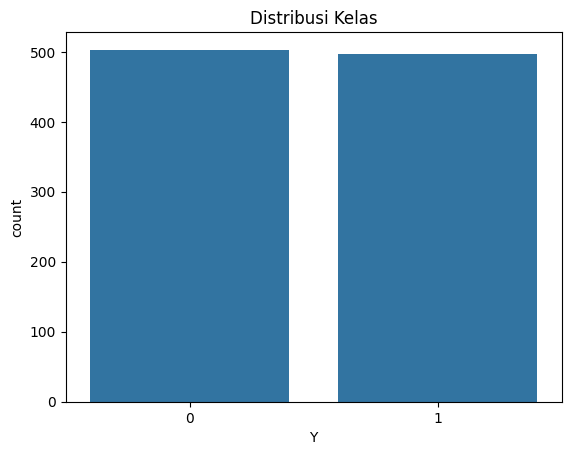

In [5]:
sns.countplot(x='Y', data=df)
plt.title('Distribusi Kelas')
plt.show()

**Penjelasan**
* Membuat model klasifikasi Random Forest dengan 100 pohon keputusan.

* `fit()`: Melatih model menggunakan data pelatihan.

## Pra-pemrosesan Data

In [9]:
# Memisahkan fitur dan target
X = df.drop('Y', axis=1)
y = df['Y']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Penjelasan**
* `predict()`: Memprediksi label dari data pengujian.

* `confusion_matrix`: Matriks yang menunjukkan jumlah prediksi benar/salah.

* `classification_report`: Menampilkan metrik seperti precision, recall, f1-score.



## Pelatihan Model dan Evaluasi

In [10]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        99
           1       0.97      0.98      0.98       101

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200

Confusion Matrix:
[[96  3]
 [ 2 99]]


**Penejelasan**
* `model.feature_importances_`: Mengambil pentingnya masing-masing fitur.

* Menampilkan 10 fitur paling berpengaruh dalam proses klasifikasi dalam bentuk bar horizontal.